In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering



In [9]:
# load the training dataset
data = pd.read_csv(r'seeds_dataset.csv')

print(str(data.columns))

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

Index(['Area', 'Perimeter', 'Compactness', 'Kernal Length', 'Kernal Width',
       'Asymetric Coefficient', 'Length of Kernal Groove', 'Group'],
      dtype='object')


,Area,Perimeter,Compactness,Kernal Length,Kernal Width,Asymetric Coefficient
44,15.11,14.54,0.8986,5.579,3.462,3.1280
201,12.67,13.32,0.8977,4.984,3.135,2.3000
42,13.16,13.55,0.9009,5.138,3.201,2.4610
113,19.14,16.61,0.8722,6.259,3.737,6.6820
22,15.88,14.90,0.8988,5.618,3.507,0.7651
87,18.98,16.66,0.8590,6.549,3.670,3.6910
168,11.35,13.12,0.8291,5.176,2.668,4.3370
152,12.26,13.60,0.8333,5.408,2.833,4.7560
165,12.10,13.15,0.8793,5.105,2.941,2.2010
187,10.91,12.80,0.8372,5.088,2.675,4.1790


In [26]:
# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10] # Just showing the first couple features

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

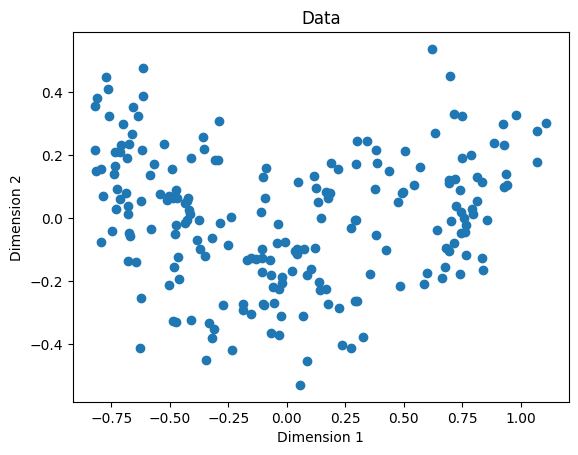

In [12]:
%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('PCA')
plt.show()

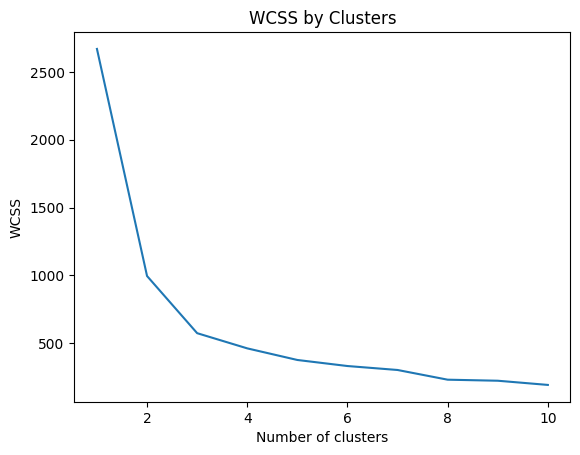

In [15]:
# Create 10 models with 1 to 10 clusters
wcss = [] # List to store kmean inertia
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the elbow plot suggests that the ideal number of clusters to use is either 2 or 3, any more would be more accurate but result in higher compute times.

In [16]:
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

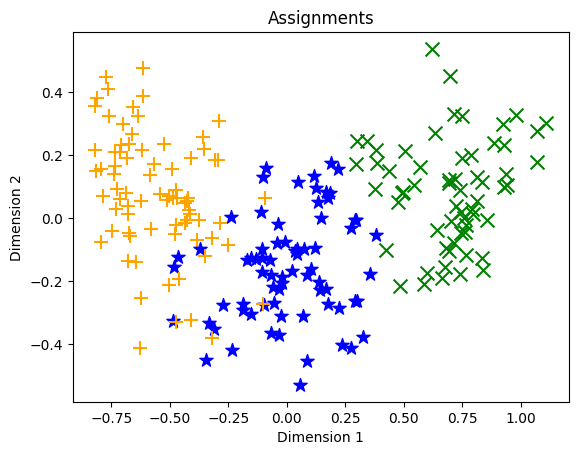

In [17]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [24]:
seed_species = data[data.columns[7]]
plot_clusters(features_2d, seed_species.values)



TypeError: unsupported operand type(s) for -: 'str' and 'int'

Hierarchical clustering methods make fewer distributional assumptions when compared to K-Means methods. However, K-Means methods are generally more scalable, sometimes very much so.

Hierarchical clustering creates clusters by using either a divisive method or an agglomerative method. The divisive method is a "top down" approach starting with the entire dataset and then finding partitions in a stepwise manner. Agglomerative clustering is a "bottom up" approach. In this lab you will work with agglomerative clustering which works as follows:

The linkage distances between each of the data points are computed.
Points are clustered pairwise with their nearest neighbor.
Linkage distances between the clusters are computed.
Clusters are combined pairwise into larger clusters.
Steps 3 and 4 are repeated until all data points are in a single cluster.
The linkage function can be computed in a number of ways:

Ward linkage measures the increase in variance for the clusters being linked.
Average linkage uses the mean pairwise distance between the members of the two clusters.
Complete or maximal linkage uses the maximum distance between the members of the two clusters.
Several different distance metrics are used to compute linkage functions:

Euclidean or l2 distance is the most widely used. This metric is only choice for the Ward linkage method.
Manhattan or l1 distance is robust to outliers and has other interesting properties.
Cosine similarity is the dot product between the location vectors, divided by the magnitudes of the vectors. Note that this metric is a measure of similarity, whereas the other two metrics are measures of difference. Similarity can be quite useful when working with data such as images or text documents.

In [21]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(features.values)
agg_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2])

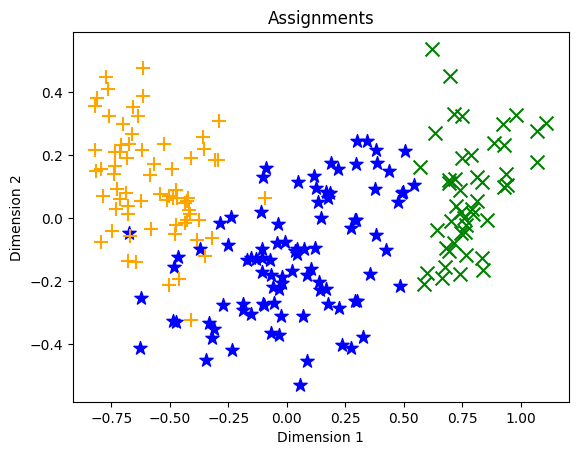

In [22]:
plot_clusters(features_2d, agg_clusters)